In [25]:
include("../src/msd.jl")

run_lorentz (generic function with 2 methods)

In [26]:
num_particles = 100000
num_collisions = 10000

@time stats_usual, stats_all = run_lorentz(num_particles, num_collisions, 10.0)

elapsed time: 3886.964435818 seconds (2034691974496 bytes allocated, 42.01% gc time)


([(0.0,0.0,0.0,NaN,NaN,100000),(10.0,0.004842370044674483,6.486963373552059,-0.03748580106477242,2.068068819795122,100000),(20.0,0.009797134241836713,15.112662045509722,-0.03424206297997898,3.276570472611298,100000),(30.0,0.00788703507405834,24.406260237965384,-0.011231884876512662,4.380177707799779,100000),(40.0,0.014381403859915494,34.25630913483406,-0.030602340706122073,5.475669954416327,100000),(50.0,0.010780346974572497,44.576787643108005,-0.022616315359748312,6.431770772119384,100000),(60.0,-0.0011960678768010182,54.874850106497796,-0.010166302610563099,7.318341305852128,100000),(70.0,0.0008962022314963746,65.17290429044053,-0.007552916978548962,7.979849961127602,100000),(80.0,0.011031524773363147,75.73122943598699,0.0008173388361607941,8.744236245676078,100000),(90.0,0.007294865416705214,86.31874606622227,0.017551203833677472,9.579441504152038,100000)  …  (21500.0,13031.99537599018,NaN,NaN,NaN,1),(21510.0,13039.511090398435,NaN,NaN,NaN,1),(21520.0,13039.66002014777,NaN,NaN,NaN,1

In [33]:
stats_usual1, stats_all1 = stats_usual, stats_all

([(0.0,0.0,0.0,NaN,NaN,100000),(10.0,0.004842370044674483,6.486963373552059,-0.03748580106477242,2.068068819795122,100000),(20.0,0.009797134241836713,15.112662045509722,-0.03424206297997898,3.276570472611298,100000),(30.0,0.00788703507405834,24.406260237965384,-0.011231884876512662,4.380177707799779,100000),(40.0,0.014381403859915494,34.25630913483406,-0.030602340706122073,5.475669954416327,100000),(50.0,0.010780346974572497,44.576787643108005,-0.022616315359748312,6.431770772119384,100000),(60.0,-0.0011960678768010182,54.874850106497796,-0.010166302610563099,7.318341305852128,100000),(70.0,0.0008962022314963746,65.17290429044053,-0.007552916978548962,7.979849961127602,100000),(80.0,0.011031524773363147,75.73122943598699,0.0008173388361607941,8.744236245676078,100000),(90.0,0.007294865416705214,86.31874606622227,0.017551203833677472,9.579441504152038,100000)  …  (21500.0,13031.99537599018,NaN,NaN,NaN,1),(21510.0,13039.511090398435,NaN,NaN,NaN,1),(21520.0,13039.66002014777,NaN,NaN,NaN,1

In [27]:
using PyPlot

In [28]:
stats2_usual = filter(x->x[6] > num_collisions/2, stats_usual)
stats2_all = filter(x->x[6] > 10000, stats_all)

times = [data[1] for data in stats2_usual];
means =[data[2] for data in stats2_usual]; 
msds = [data[3] for data in stats2_usual];


times2 = [data[1] for data in stats2_all];
means2 = [data[2] for data in stats2_all];
msds2 = [data[3] for data in stats2_all];



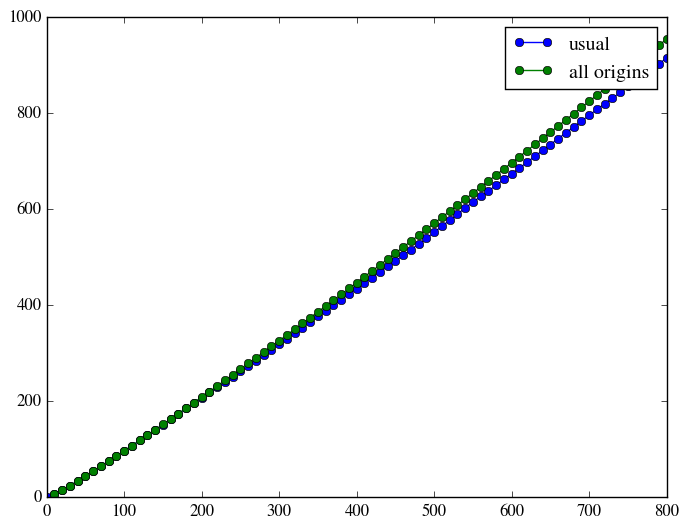

PyObject <matplotlib.legend.Legend object at 0x118162a90>

In [29]:
plot(times, msds, "o-", label="usual")
plot(times2, msds2, "o-", label="all origins")
# plot(times, means, "o-", label="usual")
# plot(times2, means2, "o-", label="all origins")

xlim(0, 800)
ylim(0, 1000)
#ylim(-1, 1)
legend()

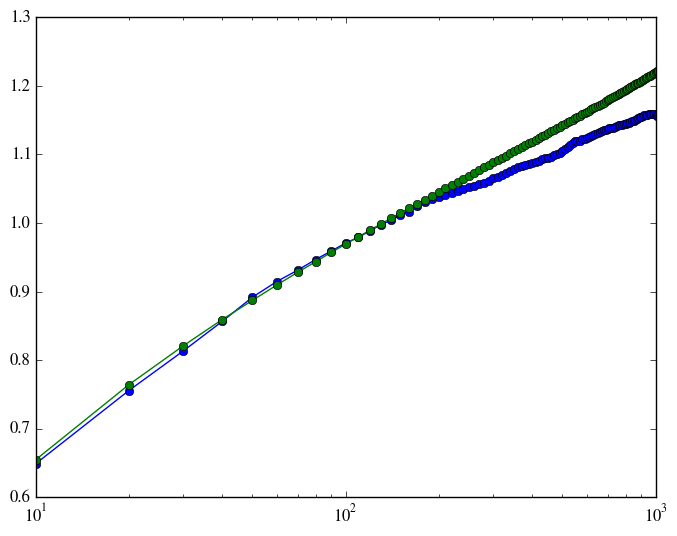

(0.6,1.3)

In [31]:
semilogx(times, msds ./ times, "o-")
semilogx(times2, msds2 ./ times2, "o-")
xlim(0, 1000)
#ylim(0, 2)
ylim(0.6, 1.3)

In [116]:
function run_particle(billiard_table, num_collisions)
    x, v = initial_condition(billiard_table, -.5, .5, -.5, .5)
    l = Vector2D(0, 0)
    p = ParticleOnLattice(x, v, l)
        
    xs, ls, free_paths = billiard_dynamics_on_lattice(p, billiard_table, num_collisions)
    positions, times = continuous_time(xs, ls, free_paths, delta_t)
end

function run_particles(billiard_table, num_particles, num_collisions)
    for i in 1:num_particles
        run_particle(billiard_table, num_collisions)
        #gc()
    end
end


run_particles (generic function with 1 method)

In [114]:

gc()
@time run_particle(billiard_table, 1000000)


elapsed time: 3.674504946 seconds (1992654648 bytes allocated, 46.68% gc time)


([Vector2D{Float64}(-0.385964099684619,-0.4339483397361421),Vector2D{Float64}(-1.3534749163722164,0.9223598719220781),Vector2D{Float64}(-2.6585034246282877,3.707211400970422),Vector2D{Float64}(-3.512326750455456,-1.0187893629672),Vector2D{Float64}(-4.372546762428787,-5.53659631503165),Vector2D{Float64}(-2.249596421449907,-4.446637200469559),Vector2D{Float64}(-2.7735205356063504,-3.5724369935788407),Vector2D{Float64}(-5.372964287368319,-4.425007096380261),Vector2D{Float64}(-10.333173851214074,-7.404398974273148),Vector2D{Float64}(-13.539744050958841,-8.217696758262218)  …  Vector2D{Float64}(-1680.4497803957017,-903.4676016108131),Vector2D{Float64}(-1683.356904776948,-904.0113374824958),Vector2D{Float64}(-1679.8419278514543,-904.4236647405563),Vector2D{Float64}(-1677.507344005385,-903.1599301741296),Vector2D{Float64}(-1679.4081531640593,-902.7141195393959),Vector2D{Float64}(-1670.985783717843,-901.4953059789648),Vector2D{Float64}(-1671.574245464399,-898.0888224299193),Vector2D{Float64}(-

In [118]:

gc()
@time run_particles(billiard_table, 10000, 1000)

elapsed time: 40.862335964 seconds (19636428640 bytes allocated, 49.07% gc time)


In [32]:
num_particles = 100000
num_collisions = 100000

@time stats_usual_new, stats_all_new = run_lorentz(num_particles, num_collisions, 50.0)

elapsed time: 36591.352598857 seconds (19927628495560 bytes allocated, 44.47% gc time)


([(0.0,0.0,0.0,NaN,NaN,100000),(50.0,0.017305010917974605,44.65507863931822,0.022799980430700424,6.115959405906301,100000),(100.0,0.048111397060719714,97.42713875013999,0.05447394577392689,10.184302705995218,100000),(150.0,0.046430096848310884,152.5581251653949,0.012134228707699838,13.836820075918876,100000),(200.0,0.03355186997650198,208.1941979506868,-0.056354977504601216,16.457370457112575,100000),(250.0,0.05066875174855612,263.58326607424425,-0.07292320478919148,19.431831235889433,100000),(300.0,0.056705107115976865,321.2084924372402,-0.09182774753796995,22.513104699816527,100000),(350.0,0.05230307405468847,380.72508637258346,-0.10169050107948359,26.39749819989671,100000),(400.0,0.06144658581294162,440.72160561210666,-0.1310106276454254,30.24651891340254,100000),(450.0,0.06881316188689357,500.5585631576715,-0.1632386497953707,34.069184270583506,100000)  …  (478500.0,516.2313965663321,NaN,NaN,NaN,1),(478550.0,510.5854451418633,NaN,NaN,NaN,1),(478600.0,506.7417424999431,NaN,NaN,NaN,1

In [34]:
stats_usual, stats_all = stats_usual_new, stats_all_new

([(0.0,0.0,0.0,NaN,NaN,100000),(50.0,0.017305010917974605,44.65507863931822,0.022799980430700424,6.115959405906301,100000),(100.0,0.048111397060719714,97.42713875013999,0.05447394577392689,10.184302705995218,100000),(150.0,0.046430096848310884,152.5581251653949,0.012134228707699838,13.836820075918876,100000),(200.0,0.03355186997650198,208.1941979506868,-0.056354977504601216,16.457370457112575,100000),(250.0,0.05066875174855612,263.58326607424425,-0.07292320478919148,19.431831235889433,100000),(300.0,0.056705107115976865,321.2084924372402,-0.09182774753796995,22.513104699816527,100000),(350.0,0.05230307405468847,380.72508637258346,-0.10169050107948359,26.39749819989671,100000),(400.0,0.06144658581294162,440.72160561210666,-0.1310106276454254,30.24651891340254,100000),(450.0,0.06881316188689357,500.5585631576715,-0.1632386497953707,34.069184270583506,100000)  …  (478500.0,516.2313965663321,NaN,NaN,NaN,1),(478550.0,510.5854451418633,NaN,NaN,NaN,1),(478600.0,506.7417424999431,NaN,NaN,NaN,1

In [35]:
stats2_usual = filter(x->x[6] > num_collisions/2, stats_usual)
stats2_all = filter(x->x[6] > 10000, stats_all)

times = [data[1] for data in stats2_usual];
means =[data[2] for data in stats2_usual]; 
msds = [data[3] for data in stats2_usual];


times2 = [data[1] for data in stats2_all];
means2 = [data[2] for data in stats2_all];
msds2 = [data[3] for data in stats2_all];



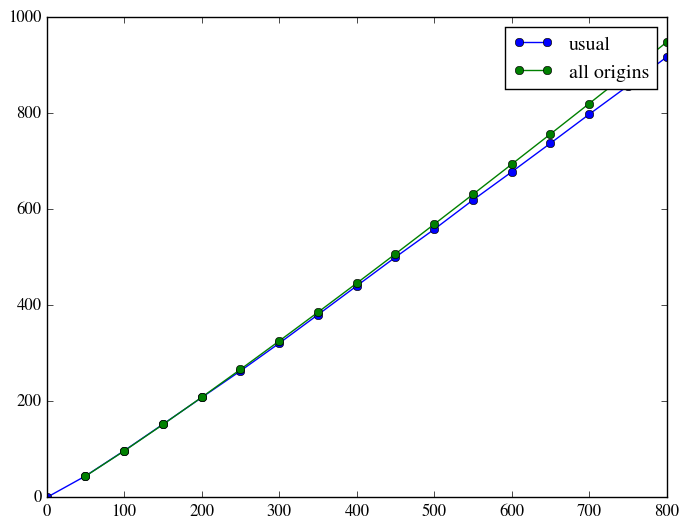

PyObject <matplotlib.legend.Legend object at 0x10b762690>

In [36]:
plot(times, msds, "o-", label="usual")
plot(times2, msds2, "o-", label="all origins")
# plot(times, means, "o-", label="usual")
# plot(times2, means2, "o-", label="all origins")

xlim(0, 800)
ylim(0, 1000)
#ylim(-1, 1)
legend()

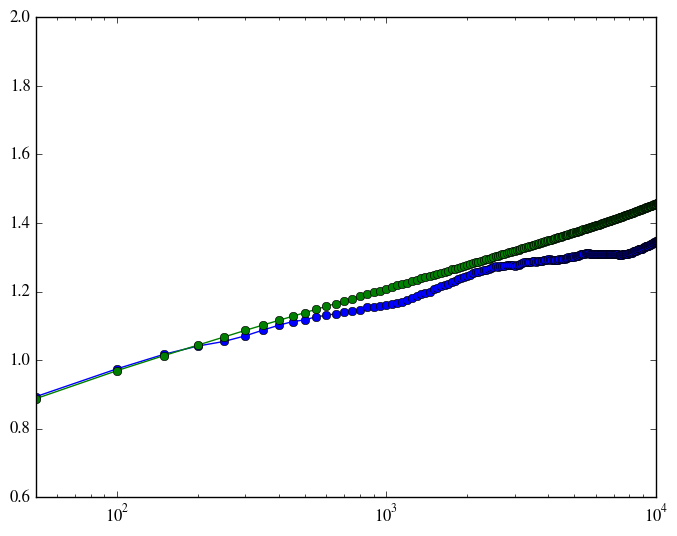

(0.6,2)

In [39]:
semilogx(times, msds ./ times, "o-")
semilogx(times2, msds2 ./ times2, "o-")
xlim(0, 10000)
#ylim(0, 2)
ylim(0.6, 2)

In [40]:
stats_all_new

9579-element Array{(Float64,Float64,Float64,Float64,Float64,Int64),1}:
 (50.0,0.00013791421918360017,44.36004881560537,-0.003025254003753477,6.3014391171687265,34287241) 
 (100.0,0.0007734965469196507,96.89445521624849,-0.0012672892198786337,10.500293162504718,34267271)
 (150.0,0.001516633176202603,151.98630958327152,0.001505580730133381,14.262962262623777,34247193)  
 (200.0,0.0019437565695509882,208.73967876647262,0.009678452467242577,17.82317393769913,34227208)  
 (250.0,0.0010335128155721256,266.8439751361774,0.018600449057861748,21.251102509576516,34207265)  
 (300.0,0.001170106757760268,325.9818333786798,0.025343105598705656,24.58561273159152,34187241)    
 (350.0,0.0017521783007769553,385.8757937738715,0.03061867689364674,27.855169578050717,34167271)   
 (400.0,0.0024477276443325186,446.36098439307085,0.03781778358280069,31.026741548639585,34147193)  
 (450.0,0.0028205557405570386,507.4972413533574,0.04960040111154175,34.184420071124705,34127208)   
 (500.0,0.0017784503795190694

In [41]:
include("../src/StatisticsAccumulator.jl")

get_statistics (generic function with 1 method)

In [42]:
Array(StatisticsObject, 3)

3-element Array{StatisticsObject,1}:
 #undef
 #undef
 #undef

In [43]:
StatisticsObject[]

0-element Array{StatisticsObject,1}

In [44]:

    billiard_table = Sinai_billiard(0.354, true, true)  # periodic in x and y

BilliardTable{Float64}(Obstacle{Float64}[Disc{Float64}(Vector2D{Float64}(0.0,0.0),0.354),CellBoundary{Float64}(Vector2D{Float64}(0.5,-0.5),Vector2D{Float64}(-1.0,0.0),Vector2D{Int64}(1,0),CellBoundary{Float64}(Vector2D{Float64}(-0.5,0.5),Vector2D{Float64}(1.0,0.0),Vector2D{Int64}(-1,0),CellBoundary{Float64}(#= circular reference =#))),CellBoundary{Float64}(Vector2D{Float64}(-0.5,0.5),Vector2D{Float64}(1.0,0.0),Vector2D{Int64}(-1,0),CellBoundary{Float64}(Vector2D{Float64}(0.5,-0.5),Vector2D{Float64}(-1.0,0.0),Vector2D{Int64}(1,0),CellBoundary{Float64}(#= circular reference =#))),CellBoundary{Float64}(Vector2D{Float64}(0.5,0.5),Vector2D{Float64}(0.0,-1.0),Vector2D{Int64}(0,1),CellBoundary{Float64}(Vector2D{Float64}(-0.5,-0.5),Vector2D{Float64}(0.0,1.0),Vector2D{Int64}(0,-1),CellBoundary{Float64}(#= circular reference =#))),CellBoundary{Float64}(Vector2D{Float64}(-0.5,-0.5),Vector2D{Float64}(0.0,1.0),Vector2D{Int64}(0,-1),CellBoundary{Float64}(Vector2D{Float64}(0.5,0.5),Vector2D{Float64}(

In [45]:
   x0, v0 = initial_condition(billiard_table, -.5, .5, -.5, .5)
        l = Vector2D(0, 0)
        p = ParticleOnLattice(x0, v0, l)


ParticleOnLattice{Float64}(Vector2D{Float64}(-0.22404895495792077,-0.35342502848393953),Vector2D{Float64}(-0.9593715402632275,0.28214579162724107),Vector2D{Int64}(0,0))

In [48]:
 xs, ls, free_paths = billiard_dynamics_on_lattice(p, billiard_table, num_collisions)
        positions, times = continuous_time(xs, ls, free_paths, delta_t)


([Vector2D{Float64}(0.10488770797543749,-0.33810437547547256),Vector2D{Float64}(356.12614125394515,-38.58417321367659)],[0.0,5.0])

In [47]:
delta_t = 5
num_collisions = 10

10

In [49]:
free_paths

10-element Array{Float64,1}:
 0.820149
 0.342202
 0.304586
 1.55061 
 0.73345 
 0.381409
 0.771764
 0.339464
 0.337281
 0.760213